In [1]:
import numpy as np
import pandas as pd

In [2]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
df1 = pd.read_csv('DrDoS_LDAP_new.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_22928\3717026788.py:1: DtypeWarning: Columns (80) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('DrDoS_LDAP_new.csv')


In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1[' Label']= label_encoder.fit_transform(df1[' Label'])
df1[' Label'].unique()

array([1, 0])

In [5]:
df1.columns

Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std',

In [6]:
df1.drop('SimillarHTTP', axis=1, inplace=True)
df1.drop(' Fwd Packet Length Max', axis=1, inplace=True)
df1.drop(' Fwd Packet Length Min', axis=1, inplace=True)
df1.drop('Bwd Packet Length Max', axis=1, inplace=True)
df1.drop(' Bwd Packet Length Min', axis=1, inplace=True)
df1.drop(' Flow IAT Max', axis=1, inplace=True)
df1.drop(' Flow IAT Min', axis=1, inplace=True)
df1.drop(' Fwd IAT Max', axis=1, inplace=True)
df1.drop(' Fwd IAT Min', axis=1, inplace=True)
df1.drop(' Bwd IAT Max', axis=1, inplace=True)
df1.drop(' Bwd IAT Min', axis=1, inplace=True)
df1.drop(' Idle Max', axis=1, inplace=True)
df1.drop(' Idle Min', axis=1, inplace=True)
df1.drop(' Active Max', axis=1, inplace=True)
df1.drop(' Active Min', axis=1, inplace=True)

In [7]:
l = []
for col in df1:
    
    try:
        if sum(df1[col]) == 0:
            l.append(col)
    except:
        print(col)

In [8]:
df1.drop(l, axis=1, inplace=True)

In [9]:
df1.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Fwd Packet Length Std,...,Label,Source IP1,Source IP2,Source IP3,Source IP4,Destination IP1,Destination IP2,Destination IP3,Destination IP4,newtime
0,0,0,0,9141643,85894,28,0.0,0.0,0.0,0.0,...,1,172,16,0,5,192,168,50,1,-127.841445
1,900,1808,17,1,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-127.841435
2,900,58766,17,2,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-127.841431
3,900,35228,17,1,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-127.841422
4,900,44969,17,2,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-127.841419


In [10]:
import matplotlib.pyplot as plt

In [11]:
no = df1[df1[' Label'] == 0]
yes = df1[df1[' Label'] == 1]
print(len(no), len(yes))

1612 2179930


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(inplace=True)

In [14]:
print(len(df1))
df1.sample(10)

2142892


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Fwd Packet Length Std,...,Label,Source IP1,Source IP2,Source IP3,Source IP4,Destination IP1,Destination IP2,Destination IP3,Destination IP4,newtime
1401578,666,54805,17,2,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-121.619540
2134446,895,23482,17,74,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-118.195059
899026,603,48525,17,1,2,0,2928.0,0.0,1464.0,0.0,...,1,172,16,0,5,192,168,50,1,-123.906377
1657125,713,56388,17,1,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-120.449993
1336978,647,45579,17,1,2,0,2816.0,0.0,1408.0,0.0,...,1,172,16,0,5,192,168,50,1,-121.933376
1852432,528,62294,17,48,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-119.556549
1410847,524,54402,17,1,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-121.578542
607569,518,26839,17,1,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-125.159188
1254960,647,53521,17,2,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-122.305637
305198,962,23381,17,1,2,0,2944.0,0.0,1472.0,0.0,...,1,172,16,0,5,192,168,50,1,-126.482855


In [15]:
no = df1[df1[' Label'] == 0]
yes = df1[df1[' Label'] == 1]
print(len(no), len(yes))

1592 2141300


In [16]:
X = df1.drop(columns = ' Label', axis=1)
y = df1[' Label']

In [17]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Assuming your dataset is stored in a DataFrame called 'df'
# Separate the majority and minority classes
majority_class = df1[df1[' Label'] == 1]
minority_class = df1[df1[' Label'] == 0]

# Upsample the minority class to 50,000 samples
minority_upsampled = resample(minority_class, replace=True, n_samples=50000, random_state=42)

# Downsample the majority class to 50,000 samples
majority_downsampled = resample(majority_class, replace=False, n_samples=50000, random_state=42)

# Combine the upsampled minority and downsampled majority classes
balanced_df = pd.concat([minority_upsampled, majority_downsampled])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42)

In [18]:
no = balanced_df[balanced_df[' Label'] == 0]
yes = balanced_df[balanced_df[' Label'] == 1]
print(len(no), len(yes))

50000 50000


In [19]:
X = balanced_df.drop(columns = ' Label', axis=1)
y = balanced_df[' Label']

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [23]:
explained_variance_ratio = pca.explained_variance_ratio_

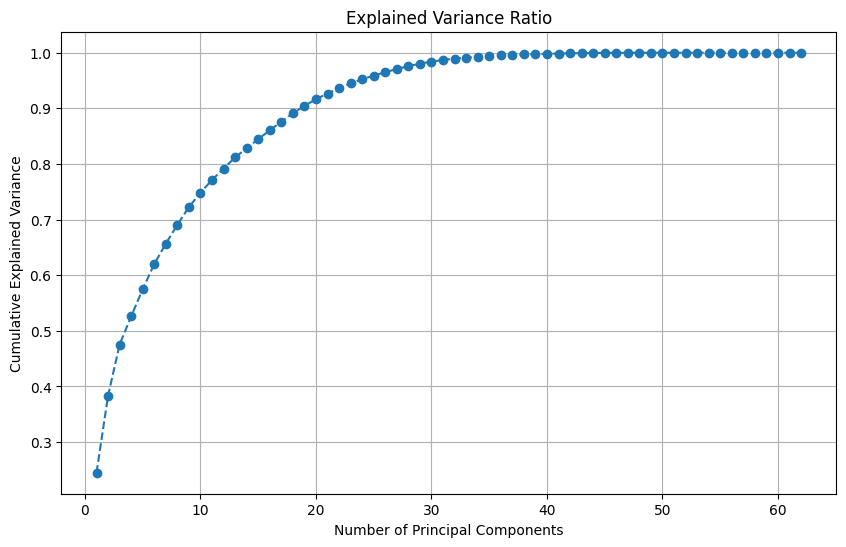

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [25]:
eigenvalues = pca.explained_variance_
eigenvalues = np.round(eigenvalues,5)
print("Eigenvalues:")
print(len(eigenvalues))
print(eigenvalues.tolist())

Eigenvalues:
62
[15.18398, 8.5709, 5.71224, 3.14617, 3.01639, 2.82106, 2.26781, 2.10103, 1.96891, 1.61718, 1.40425, 1.28311, 1.22868, 1.04412, 1.00115, 0.98661, 0.96358, 0.93566, 0.80882, 0.75809, 0.62927, 0.60651, 0.5213, 0.46739, 0.40713, 0.37727, 0.35904, 0.3156, 0.27887, 0.23443, 0.17284, 0.14772, 0.10681, 0.09619, 0.07899, 0.07283, 0.06551, 0.04553, 0.04059, 0.03553, 0.03034, 0.02634, 0.0209, 0.01307, 0.01023, 0.00708, 0.00572, 0.00449, 0.0019, 0.00091, 0.00027, 0.0002, 7e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [26]:
principal_components = pca.components_
print("Principal Components (Loadings):")
print(principal_components)

Principal Components (Loadings):
[[ 2.13856658e-01 -1.52108852e-01 -1.86925187e-01 ...  1.49091777e-02
   1.35741193e-01  8.59148137e-03]
 [ 4.38262686e-03 -7.78603503e-04  1.89625024e-02 ...  4.66963735e-02
   4.73178760e-02 -2.23231721e-02]
 [-9.07620671e-02  8.21011464e-02 -3.12901769e-02 ...  7.68535037e-02
   2.45295125e-02  2.13369443e-02]
 ...
 [-0.00000000e+00 -5.84228812e-18  2.85544663e-16 ... -1.24900090e-16
   1.11022302e-16  3.46944695e-18]
 [ 0.00000000e+00 -2.87474853e-16 -3.75684845e-16 ...  1.38777878e-17
  -2.77555756e-17 -6.93889390e-17]
 [-0.00000000e+00 -2.06303675e-16  3.54097914e-16 ...  1.42247325e-16
  -1.17093835e-16 -9.02056208e-17]]


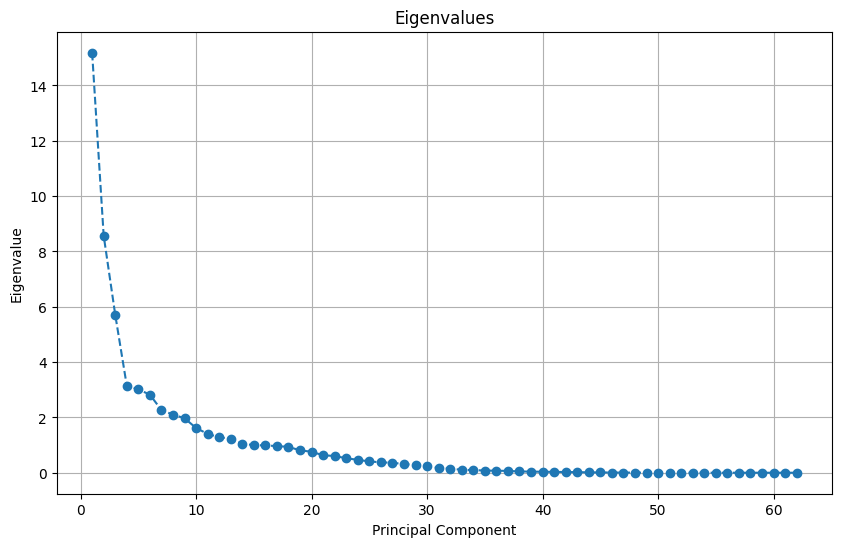

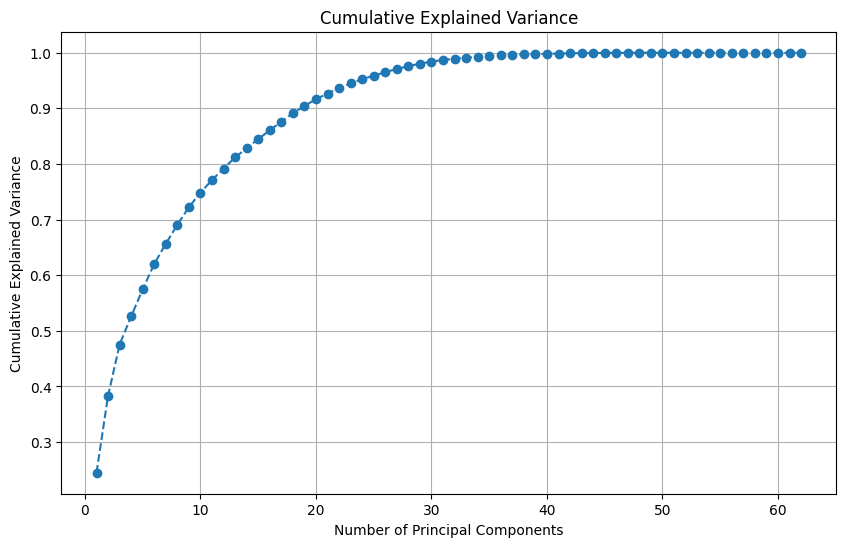

In [27]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Eigenvalues')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

explained_variance_ratio = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves

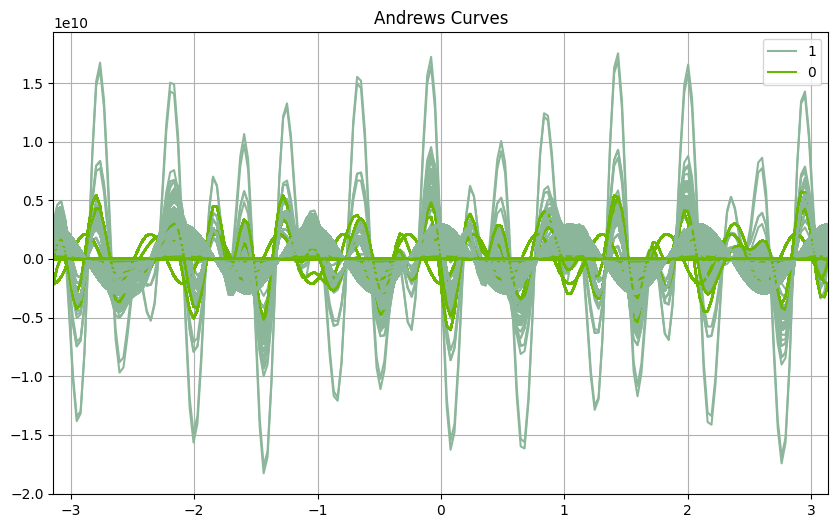

In [29]:
class_column = ' Label'

# Create the Andrews curves plot
plt.figure(figsize=(10, 6))
andrews_curves(balanced_df, class_column)
plt.title("Andrews Curves")
plt.show()